<a href="https://colab.research.google.com/github/faranbutt/Prediction-of-MNIST-dataset-with-95-accuracy/blob/main/95_Accurate_MNIST_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras import Sequential
from keras.datasets import mnist
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,classification_report,accuracy_score

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [ ]:
x_test.shape,y_test.shape

((10000, 28, 28), (10000,))

In [ ]:
x_train=x_train/255
x_test=x_test/255

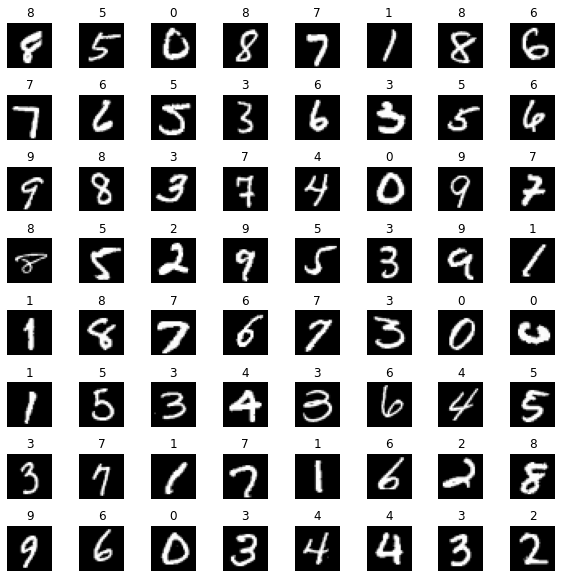

In [ ]:
m,n,c=x_train.shape
fig,axes=plt.subplots(8,8,figsize=(8,8))
fig.tight_layout(pad=0.1)
for i,ax in enumerate(axes.flat):
  random_index=np.random.randint(m)
  x_rand_reshaped=x_train[random_index].reshape(28,28)
  ax.imshow(x_rand_reshaped,cmap='gray')
  ax.set_title(y_train[random_index])
  ax.set_axis_off()

In [ ]:
model=Sequential([
    Flatten(input_shape=[28,28]),
    Dense(25,activation='relu'),
    Dense(15,activation='relu'),
    Dense(10,activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=True)
              ,metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 5s 3ms/step - loss: 0.4007 - accuracy: 0.8808
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2036 - accuracy: 0.9402
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1703 - accuracy: 0.9491
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1515 - accuracy: 0.9548
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1367 - accuracy: 0.9593
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1241 - accuracy: 0.9626
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1147 - accuracy: 0.9654
Epoch 8/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1066 - accuracy: 0.9673
Epoch 9/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0994 - accuracy: 0.9695
Epoch 10/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0922 

In [ ]:
prediction=model.predict(x_test)

In [ ]:
new_pred = tf.math.argmax(prediction, axis = 1)
new_pred.numpy()

array([7, 2, 1, ..., 4, 5, 6])

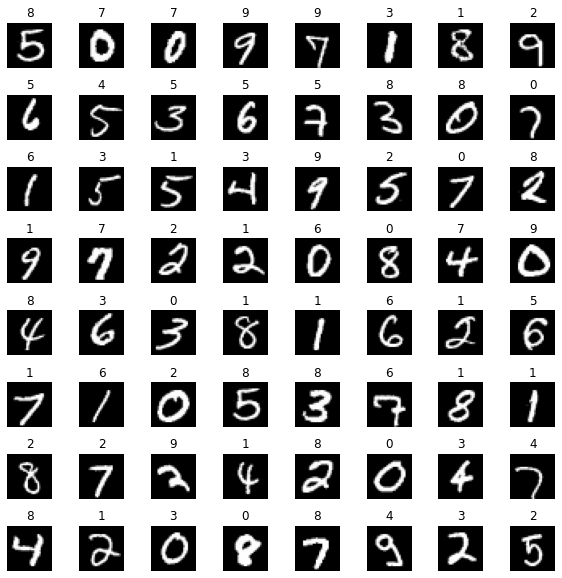

In [ ]:
m,n,c=x_test.shape
fig,axes=plt.subplots(8,8,figsize=(8,8))
fig.tight_layout(pad=0.1)
for i,ax in enumerate(axes.flat):
  random_index=np.random.randint(m)
  x_rand_reshaped=x_train[random_index].reshape(28,28)
  ax.imshow(x_rand_reshaped,cmap='gray')
  ax.set_title(new_pred[random_index].numpy())
  ax.set_axis_off()

In [ ]:
c_m=confusion_matrix(y_test,new_pred)
c_m

array([[ 962,    1,    5,    0,    3,    3,    3,    1,    1,    1],
       [   0, 1118,    6,    2,    0,    0,    2,    1,    5,    1],
       [   6,    2,  996,    7,    1,    0,    2,   11,    5,    2],
       [   1,    2,    9,  952,    1,   29,    0,    5,    5,    6],
       [   0,    0,    7,    0,  941,    2,    7,    3,    3,   19],
       [   3,    0,    2,   14,    1,  850,    5,    1,   10,    6],
       [   8,    3,    3,    3,    5,   15,  916,    0,    5,    0],
       [   1,    6,   11,    5,    2,    3,    0,  990,    3,    7],
       [   5,    1,    6,   16,    6,   15,    3,    5,  913,    4],
       [   8,    2,    1,    7,   13,    4,    0,    8,   12,  954]])

In [ ]:
labels=[0,1,2,3,4,5,6,7,8,9]

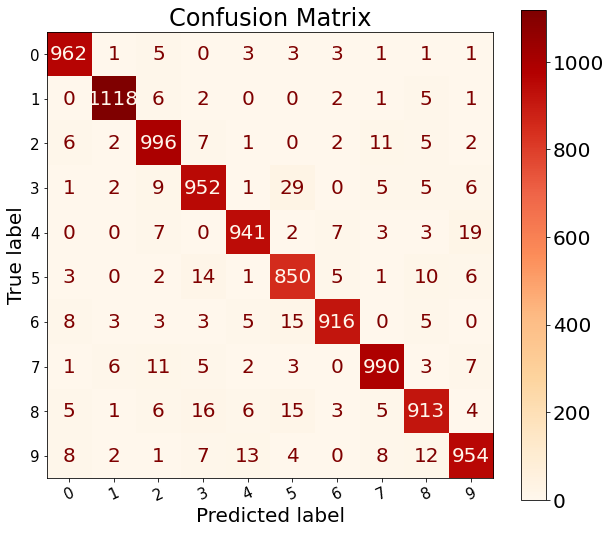

In [ ]:
%matplotlib inline


# Setting default size of the plot
# Setting default fontsize used in the plot
plt.rcParams['figure.figsize'] = (10.0, 9.0)
plt.rcParams['font.size'] = 20


# Implementing visualization of Confusion Matrix
display_c_m = ConfusionMatrixDisplay(c_m, display_labels=labels)


# Plotting Confusion Matrix
# Setting colour map to be used
display_c_m.plot(cmap='OrRd', xticks_rotation=25)
# Other possible options for colour map are:
# 'autumn_r', 'Blues', 'cool', 'Greens', 'Greys', 'PuRd', 'copper_r'


# Setting fontsize for xticks and yticks
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


# Giving name to the plot
plt.title('Confusion Matrix', fontsize=24)


# Saving plot
plt.savefig('confusion_matrix.png', transparent=True, dpi=500)


# Showing the plot
plt.show()


In [ ]:
print("Accuracy  = ",accuracy_score(y_test,new_pred))

Accuracy  =  0.9592
